In [1]:
import pandas as pd
import numpy as np
from langdetect import detect as langdetect
import random
from numpy.random import seed
random.seed(42)
seed(42)

In [2]:
cwa_path = '../../data/labeled/2018_-_Cities_Water_Actions.csv'
cwr_path = '../../data/labeled/2018_-_Cities_Water_Risks.csv'

In [3]:
cwa = pd.read_csv(cwa_path)
cwa.head()

,Account No,Organisation,City,Country,Region,Access,C40,Reporting Year,Risks to city's water supply,Adaptation action,Action description,City Location
0,1093,City of Atlanta,Atlanta,United States of America,North America,public,NaN,2018,Increased water stress or scarcity,Investment in existing water supply infrastruc...,"The city is building a new reservoir, fixing t...","(33.749, -84.388)"
1,1184,City of Austin,Austin,United States of America,North America,public,C40,2018,Increased water stress or scarcity,Conservation awareness and education,NaN,"(30.2672, -97.7431)"
2,1184,City of Austin,Austin,United States of America,North America,public,C40,2018,Increased water stress or scarcity,Conservation incentives,NaN,"(30.2672, -97.7431)"
3,1184,City of Austin,Austin,United States of America,North America,public,C40,2018,Increased water stress or scarcity,Water use restrictions,NaN,"(30.2672, -97.7431)"
4,1184,City of Austin,Austin,United States of America,North America,public,C40,2018,Increased water stress or scarcity,Efficiency regulations or standards,NaN,"(30.2672, -97.7431)"


In [4]:
cwr = pd.read_csv(cwr_path)
cwr.head()

,Account No,Organisation,City,Country,Region,Access,C40,Reporting year,Risks to city's water supply,Timescale,Magnitude,Risk description,Current population,Population year,City Location
0,1093,City of Atlanta,Atlanta,United States of America,North America,public,NaN,2018,Increased water stress or scarcity,Short-term,Serious,The city depends on one river for water supply...,450182.0,2017,"(33.749, -84.388)"
1,1093,City of Atlanta,Atlanta,United States of America,North America,public,NaN,2018,Higher water prices,Current,Serious,The water cost burden is felt across all ZIP c...,450182.0,2017,"(33.749, -84.388)"
2,1184,City of Austin,Austin,United States of America,North America,public,C40,2018,Increased water stress or scarcity,Medium-term,Extremely serious,NaN,1265974.0,2017,"(30.2672, -97.7431)"
3,1499,Ajuntament de Barcelona,Barcelona,Spain,Europe,public,C40,2018,Increased water stress or scarcity,Current,Extremely serious,The downscaling of the climate projections at ...,1604555.0,2015,"(41.3823, 2.1775)"
4,1499,Ajuntament de Barcelona,Barcelona,Spain,Europe,public,C40,2018,Declining water quality,Medium-term,Serious,A reduction in water resources availability c...,1604555.0,2015,"(41.3823, 2.1775)"


In [5]:
# Convert columns names to lowercase
cwa.columns = cwa.columns.str.lower().str.replace(" ", "_").str.replace("'","")
cwr.columns = cwr.columns.str.lower().str.replace(" ", "_").str.replace("'","")

In [6]:
cwr.isnull().sum()

account_no                       0
organisation                     0
city                             0
country                          0
region                           0
access                           0
c40                            504
reporting_year                   0
risks_to_citys_water_supply     40
timescale                       11
magnitude                      159
risk_description               107
current_population               0
population_year                  0
city_location                    0
dtype: int64

In [7]:
cwa.isnull().sum()

account_no                       0
organisation                     0
city                             0
country                          0
region                           0
access                           0
c40                            536
reporting_year                   0
risks_to_citys_water_supply     75
adaptation_action               19
action_description             146
city_location                    0
dtype: int64

In [8]:
id_columns = list(set(cwr.columns) & set(cwa.columns))
id_columns

['account_no',
 'city',
 'reporting_year',
 'city_location',
 'country',
 'access',
 'risks_to_citys_water_supply',
 'region',
 'c40',
 'organisation']

In [9]:
cwr[id_columns].isnull().sum()

account_no                       0
city                             0
reporting_year                   0
city_location                    0
country                          0
access                           0
risks_to_citys_water_supply     40
region                           0
c40                            504
organisation                     0
dtype: int64

In [10]:
cwa[id_columns].isnull().sum()

account_no                       0
city                             0
reporting_year                   0
city_location                    0
country                          0
access                           0
risks_to_citys_water_supply     75
region                           0
c40                            536
organisation                     0
dtype: int64

In [11]:
cwr['c40'] = cwr['c40'] == 'C40'
cwr[id_columns] = cwr[id_columns].fillna('nan')

In [12]:
cwa['c40'] = cwa['c40'] == 'C40'
cwa[id_columns] = cwa[id_columns].fillna('nan')

In [13]:
len(cwa[id_columns]), len(cwa[id_columns].drop_duplicates())


(685, 484)

In [14]:
len(cwr[id_columns]), len(cwr[id_columns].drop_duplicates())

(608, 578)

In [15]:
cwa_agg = cwa.groupby(id_columns).agg(set).reset_index()
cwr_agg = cwr.groupby(id_columns).agg(set).reset_index()
cwr_agg.magnitude = cwr_agg.magnitude.apply(lambda x: {'Extremely serious' if 'Extremely serious' in x  else ('Serious' if 'Serious' in x else list(x)[0])})

In [16]:
cwr_agg.magnitude

0                {Serious}
1                {Serious}
2      {Extremely serious}
3                {Serious}
4                {Serious}
              ...         
573         {Less Serious}
574              {Serious}
575              {Serious}
576              {Serious}
577              {Serious}
Name: magnitude, Length: 578, dtype: object

In [17]:
cw_data = pd.merge(cwa_agg, cwr_agg, on=id_columns, how='outer').applymap(lambda x: {np.nan} if pd.isna(x) else x)

In [18]:
cw_data.head()

,account_no,city,reporting_year,city_location,country,access,risks_to_citys_water_supply,region,c40,organisation,adaptation_action,action_description,timescale,magnitude,risk_description,current_population,population_year
0,1093,Atlanta,2018,"(33.749, -84.388)",United States of America,public,Increased water stress or scarcity,North America,False,City of Atlanta,{Investment in existing water supply infrastru...,"{The city is building a new reservoir, fixing ...",{Short-term},{Serious},{The city depends on one river for water suppl...,{450182.0},{2017}
1,1184,Austin,2018,"(30.2672, -97.7431)",United States of America,public,Increased water stress or scarcity,North America,True,City of Austin,"{Conservation awareness and education, Investm...",{nan},{Medium-term},{Extremely serious},{nan},{1265974.0},{2017}
2,1499,Barcelona,2018,"(41.3823, 2.1775)",Spain,public,Declining water quality,Europe,True,Ajuntament de Barcelona,{Conservation awareness and education},{nan},{Medium-term},{Serious},{A reduction in water resources availability ...,{1604555.0},{2015}
3,1499,Barcelona,2018,"(41.3823, 2.1775)",Spain,public,Inadequate or aging infrastructure,Europe,True,Ajuntament de Barcelona,{Investment in existing water supply infrastru...,{nan},{nan},{nan},{nan},{nan},{nan}
4,1499,Barcelona,2018,"(41.3823, 2.1775)",Spain,public,Increased water demand,Europe,True,Ajuntament de Barcelona,{Diversifying water supply (including new sour...,{Barcelona has the Alternative Water Resources...,{Medium-term},{Serious},{Various studies predict reduced surface resou...,{1604555.0},{2015}


In [19]:
cw_data['city_location'] = cw_data['city_location'].apply(eval)
cw_data['latitude'] = cw_data['city_location'].apply(lambda x: x[0])
cw_data['longitude'] = cw_data['city_location'].apply(lambda x: x[1])
id_columns = [x for x in id_columns] + ['latitude','longitude']


In [20]:
cw_value_columns = [ x for x in cw_data.columns if x not in id_columns]
# Values that can be converted back to strings from sets

singular_cols = cw_data.set_index(id_columns).applymap(lambda x: len(x)==1).product() > 0
singular_cols

adaptation_action     False
action_description    False
timescale             False
magnitude              True
risk_description      False
current_population     True
population_year        True
dtype: bool

In [21]:
cw_data[cw_data.magnitude.apply(lambda x: len(x)>1)]

,account_no,city,reporting_year,city_location,country,access,risks_to_citys_water_supply,region,c40,organisation,adaptation_action,action_description,timescale,magnitude,risk_description,current_population,population_year,latitude,longitude


In [32]:
singular_cols = cw_data.set_index(id_columns).applymap(lambda x: len(x)==1).product() > 0

TypeError: object of type 'float' has no len()

In [23]:
# magnitude is nicely singular per id
cw_data.loc[:, singular_cols[singular_cols].index] = cw_data.loc[:, singular_cols[singular_cols].index].applymap(lambda x: list(x)[0])
print(singular_cols)

adaptation_action     False
action_description    False
timescale             False
magnitude              True
risk_description      False
current_population     True
population_year        True
dtype: bool


In [24]:
def try_lang_detect_except(x):
    try:
        return (langdetect(x)=='en')
    except:
        return False
cw_data = cw_data.applymap(lambda x: [t for t in x if not pd.isnull(t)  and  (t!='') and (t!='ERROR: #NAME?') and try_lang_detect_except(t)] if isinstance(x,set) else x)

In [25]:
cw_data.risks_to_citys_water_supply = cw_data.risks_to_citys_water_supply.apply(lambda x: x.replace('Inadequate or ageing infrastructure','Inadequate or aging infrastructure') if isinstance(x, str) else x)

In [26]:
to_drop = ['timescale','current_population','population_year']
cw_data.drop(columns=['timescale','current_population','population_year'],inplace=True)
singular_cols = [x for x in singular_cols if x in cw_data.columns]

In [27]:
value_columns = set([x for x in cw_value_columns if x not in to_drop] + ['risks_to_citys_water_supply'])
list_columns = cw_data.iloc[0].apply(lambda x: isinstance(x, list))
list_columns = list_columns[list_columns].index
len_columns = set()
for x in value_columns.copy():
    if x in list_columns:
        cw_data[x+'_n'] = cw_data[x].apply(lambda x: len(x) if x else np.nan)
        len_columns.add(x+'_n')
value_columns = value_columns.union(len_columns)
value_columns

{'action_description',
 'action_description_n',
 'adaptation_action',
 'adaptation_action_n',
 'magnitude',
 'risk_description',
 'risk_description_n',
 'risks_to_citys_water_supply'}

In [28]:
c40_data = cw_data[cw_data['c40']].copy()

In [34]:
list_nulls = c40_data[list_columns].applymap(lambda x: len(x) == 0)
list_nulls.mean()

adaptation_action     0.366071
action_description    0.464286
risk_description      0.366071
dtype: float64

In [35]:
list_nulls.shape

(112, 3)

In [36]:
total_nulls = pd.concat([c40_data[id_columns], list_nulls],axis=1)


In [38]:
c40_data['magnitude'].unique()

array(['Extremely serious', 'Serious', nan, 'Less Serious'], dtype=object)

In [39]:
c40_risks = c40_data[id_columns+['magnitude']].copy()
c40_risks['low'] = c40_risks['magnitude'] == 'Less Serious'
c40_risks['medium'] = c40_risks['magnitude'] == 'Serious'
c40_risks['high'] = c40_risks['magnitude'] == 'Extremely serious'
c40_risks['unknown'] = c40_risks['magnitude'].isna()
c40_risks = c40_risks.drop(columns=['magnitude']).groupby([x for x in id_columns if x!="risks_to_citys_water_supply"]).agg(sum).reset_index()
c40_risks

,account_no,city,reporting_year,city_location,country,access,region,c40,organisation,latitude,longitude,low,medium,high,unknown
0,1184,Austin,2018,"(30.2672, -97.7431)",United States of America,public,North America,True,City of Austin,30.26720,-97.74310,0,0,1,0
1,1499,Barcelona,2018,"(41.3823, 2.1775)",Spain,public,Europe,True,Ajuntament de Barcelona,41.38230,2.17750,0,3,1,1
2,3422,London,2018,"(51.5048, -0.07868)",United Kingdom of Great Britain and Northern I...,public,Europe,True,Greater London Authority,51.50480,-0.07868,1,2,0,0
3,3429,Stockholm,2018,"(59.3293, 18.0686)",Sweden,public,Europe,True,City of Stockholm,59.32930,18.06860,1,1,0,0
4,14088,Oslo,2018,"(59.9139, 10.7522)",Norway,public,Europe,True,City of Oslo,59.91390,10.75220,1,0,1,1
5,14874,"Portland, OR",2018,"(45.52, -122.682)",United States of America,public,North America,True,"City of Portland, OR",45.52000,-122.68200,0,0,0,5
6,16581,Seattle,2018,"(47.6062, -122.332)",United States of America,public,North America,True,City of Seattle,47.60620,-122.33200,0,0,0,1
7,20113,Vancouver,2018,"(49.2612, -123.114)",Canada,public,North America,True,City of Vancouver,49.26120,-123.11400,1,0,0,0
8,31090,"Washington, DC",2018,"(38.9072, -77.0369)",United States of America,public,North America,True,District of Columbia,38.90720,-77.03690,0,3,0,1
9,31109,City of Melbourne,2018,"(-37.8141, 144.963)",Australia,public,Southeast Asia and Oceania,True,City of Melbourne,-37.81410,144.96300,0,2,0,0


In [40]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import sent_tokenize, word_tokenize

In [41]:
import spacy
try:
    nlp = spacy.load("en_core_web_md")
except:
    spacy.cli.download('en_core_web_md')
    nlp = spacy.load("en_core_web_md")

In [42]:
def create_vector(description):
    ret = description.apply(lambda x:nlp('.'.join(x)).vector if x else [np.nan for _ in range(300)])
    ret = np.vstack(ret)
    return ret

In [43]:
c40_data_action_description = create_vector(c40_data.action_description)
c40_data_adaptation_action = create_vector(c40_data.adaptation_action)

In [44]:
c40_data.risks_to_citys_water_supply = c40_data.risks_to_citys_water_supply.apply(lambda x: np.nan if x=='nan' else x)

In [45]:
c40_data[c40_data.risks_to_citys_water_supply.isnull()]

,account_no,city,reporting_year,city_location,country,access,risks_to_citys_water_supply,region,c40,organisation,adaptation_action,action_description,magnitude,risk_description,latitude,longitude,adaptation_action_n,action_description_n,risk_description_n
16,14088,Oslo,2018,"(59.9139, 10.7522)",Norway,public,NaN,Europe,True,City of Oslo,[Stormwater management (natural or man-made in...,[High activity on re-opening urban rivers and ...,NaN,[],59.9139,10.7522,3.0,4.0,NaN
22,14874,"Portland, OR",2018,"(45.52, -122.682)",United States of America,public,NaN,North America,True,"City of Portland, OR",[Watershed preservation],[Portland seeks to manage the watershed in way...,NaN,"[Portland has a secondary, redundant, groundwa...",45.5200,-122.6820,1.0,1.0,1.0
37,31111,Tokyo,2018,"(35.41, 139.41)",Japan,public,NaN,East Asia,True,Tokyo Metropolitan Government,[],[Implementing measures against flood],Serious,[],35.4100,139.4100,NaN,1.0,NaN
42,31115,Johannesburg,2018,"(-26.2041, 28.0473)",South Africa,public,NaN,Africa,True,City of Johannesburg,[Water use restrictions],[A by-law that effects water restrictions is i...,NaN,[],-26.2041,28.0473,1.0,1.0,NaN
49,31166,Jakarta,2018,"(-6.1751, 106.865)",Indonesia,public,NaN,Southeast Asia and Oceania,True,Jakarta City Government,[Other: Stormwater management (natural or man ...,[- Restore damaged and lost water ecosystems (...,NaN,[Increased frequency of rain affecting the are...,-6.1751,106.8650,1.0,1.0,1.0
121,35904,Kolkata,2018,"(22.5726, 88.3639)",India,public,NaN,South and West Asia,True,Kolkata Metropolitan Area,[Stormwater management (natural or man-made in...,[Channelisation of drains Construction of new ...,NaN,[53% of the boroughs within Kolkata Municipal ...,22.5726,88.3639,2.0,2.0,2.0
229,50782,Dhaka,2018,"(23.8103, 90.4125)",Bangladesh,public,NaN,South and West Asia,True,Dhaka City,[Stormwater management (natural or man-made in...,[Embankment is constructed around Dhaka City t...,NaN,[Increases water born diseases],23.8103,90.4125,1.0,1.0,1.0


In [46]:
c40_data.risks_to_citys_water_supply.unique()

array(['Increased water stress or scarcity', 'Declining water quality',
       'Inadequate or aging infrastructure', 'Increased water demand',
       nan, 'Higher water prices', 'Regulatory', 'Energy supply issues'],
      dtype=object)

In [47]:
cw_value_columns

['adaptation_action',
 'action_description',
 'timescale',
 'magnitude',
 'risk_description',
 'current_population',
 'population_year']

In [48]:
value_columns

{'action_description',
 'action_description_n',
 'adaptation_action',
 'adaptation_action_n',
 'magnitude',
 'risk_description',
 'risk_description_n',
 'risks_to_citys_water_supply'}

In [50]:
vectorized = np.hstack([create_vector(c40_data[x]) for x in value_columns if x in list_columns])

In [51]:
cols_to_encode =  [x for x in value_columns if x not in list_columns and x not in len_columns]
c40_data[cols_to_encode] = c40_data[cols_to_encode].fillna('nan')
encoders = {x:LabelEncoder().fit(c40_data[x].fillna('nan')) for x in cols_to_encode}

In [52]:
encoded = np.array([encoders[x].transform(c40_data[x]) for x in encoders]).T.astype(float)
for t in range(len(cols_to_encode)):
    encoded[encoded[:,t] == np.where(encoders[cols_to_encode[t]].classes_=='nan')[0]] = np.nan

In [53]:
lab_freqs = c40_data[cols_to_encode].groupby(cols_to_encode,as_index=False).size()
lab_freqs

,magnitude,risks_to_citys_water_supply,size
0,Extremely serious,Energy supply issues,1
1,Extremely serious,Higher water prices,1
2,Extremely serious,Inadequate or aging infrastructure,3
3,Extremely serious,Increased water demand,1
4,Extremely serious,Increased water stress or scarcity,8
5,Less Serious,Declining water quality,2
6,Less Serious,Higher water prices,1
7,Less Serious,Inadequate or aging infrastructure,2
8,Less Serious,Increased water demand,1
9,Less Serious,Increased water stress or scarcity,3


In [54]:
whole = np.hstack([encoded, vectorized, c40_data[len_columns]])

In [55]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest
class LabeledDatasetImputer:
    """
    Imputes missing data on y. Assumes also missing data on X. Uses two different types of imputation, as it assumes that y is Categorical
    k_features_per_label: the number of features to keep from X for the imputation
    """
    def __init__(self, k_features_per_label=40,verbose=0):
        self.x_imputer = None
        self.y_imputer = None
        self.verbose = verbose
        self.selection_mask = None
        self.k_features_per_label = k_features_per_label
    
    def create_selection_mask(self, X, y):
        if not self.k_features_per_label:
            return np.zeros(X.shape[1])==0
        selection_mask = None
        for cnt in range(y.shape[1]):
            labeled = ~np.isnan(y[:,cnt])
            _y = y[labeled,cnt]
            _x = X[labeled,:]
            
            selector = SelectKBest(k=self.k_features_per_label).fit(np.nan_to_num(_x), _y)
            if selection_mask is None:
                selection_mask = selector.get_support()
            else:
                selection_mask = (selection_mask + selector.get_support())>0
        return selection_mask
    
    def fit_transform(self, X, y, ret_imputed_x=False):
        print("Applying feature selection..")
        self.selection_mask = self.create_selection_mask(X, y)
        print("Creating imputed X using IterativeImputer..")
        self.x_imputer = IterativeImputer(ExtraTreesRegressor(), initial_strategy='median',verbose=self.verbose)
        imputed_x = self.x_imputer.fit_transform(X[:, self.selection_mask])
        print("Creating imputed Y using KNNImputer..")
        self.y_imputer = KNNImputer(weights='distance').fit(np.hstack([y, imputed_x]))
        imputed_y = self.y_imputer.transform(np.hstack([y, imputed_x]))[:,:y.shape[1]]
        if ret_imputed_x:
            return imputed_x, imputed_y
        return imputed_y

    def transform(self, X, y, ret_imputed_x=False):
        imputed_x = self.x_imputer.transform(X[:,self.selection_mask])
        # rounding made feasible due to the weights distancing, otherwise imputation would be meaningless
        ret = np.round(self.y_imputer.transform(np.hstack([y, imputed_x]))[:,:y.shape[1]]) 
        if ret_imputed_x:
            return imputed_x, ret
        return ret

In [56]:
imputer = LabeledDatasetImputer(verbose=2)
continuous_imputed, y = imputer.fit_transform(whole[:,2:], whole[:,:2], ret_imputed_x=True)

Applying feature selection..
Creating imputed X using IterativeImputer..
[IterativeImputer] Completing matrix with shape (112, 80)
[IterativeImputer] Ending imputation round 1/10, elapsed time 7.63
[IterativeImputer] Change: 1.4605544854683103, scaled tolerance: 0.002700549840927124 
[IterativeImputer] Ending imputation round 2/10, elapsed time 15.20
[IterativeImputer] Change: 0.969455256541696, scaled tolerance: 0.002700549840927124 
[IterativeImputer] Ending imputation round 3/10, elapsed time 23.04
[IterativeImputer] Change: 0.6773437039973214, scaled tolerance: 0.002700549840927124 
[IterativeImputer] Ending imputation round 4/10, elapsed time 30.74
[IterativeImputer] Change: 0.5056854151267907, scaled tolerance: 0.002700549840927124 
[IterativeImputer] Ending imputation round 5/10, elapsed time 38.47
[IterativeImputer] Change: 0.42994363593286855, scaled tolerance: 0.002700549840927124 
[IterativeImputer] Ending imputation round 6/10, elapsed time 46.18
[IterativeImputer] Change: 

/home/vaslem/code/Modern Data Analytics/.venv/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


(82, 82)


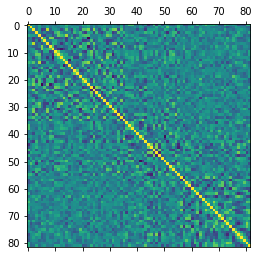

In [57]:
import matplotlib.pyplot as plt
flg = np.all(~np.isnan(whole),axis=1), np.hstack([[True, True], imputer.selection_mask[:]])
corr = np.corrcoef(whole[flg[0],:][:,flg[1]].T)
print(corr.shape)
plt.matshow(corr)

In [58]:
imputed = np.array([
    encoders[x].inverse_transform(
    y[:, c].astype(int)
 ) for c,x in enumerate(cols_to_encode)]).T

In [59]:
c40_data_imputed = c40_data.copy()

In [60]:
c40_data_imputed[cols_to_encode] = imputed

In [61]:
c40_data_imputed

,account_no,city,reporting_year,city_location,country,access,risks_to_citys_water_supply,region,c40,organisation,adaptation_action,action_description,magnitude,risk_description,latitude,longitude,adaptation_action_n,action_description_n,risk_description_n
1,1184,Austin,2018,"(30.2672, -97.7431)",United States of America,public,Increased water stress or scarcity,North America,True,City of Austin,"[Conservation awareness and education, Investm...",[],Extremely serious,[],30.26720,-97.7431,9.0,NaN,NaN
2,1499,Barcelona,2018,"(41.3823, 2.1775)",Spain,public,Declining water quality,Europe,True,Ajuntament de Barcelona,[Conservation awareness and education],[],Serious,[A reduction in water resources availability ...,41.38230,2.1775,1.0,NaN,1.0
3,1499,Barcelona,2018,"(41.3823, 2.1775)",Spain,public,Inadequate or aging infrastructure,Europe,True,Ajuntament de Barcelona,[Investment in existing water supply infrastru...,[],Less Serious,[],41.38230,2.1775,1.0,NaN,NaN
4,1499,Barcelona,2018,"(41.3823, 2.1775)",Spain,public,Increased water demand,Europe,True,Ajuntament de Barcelona,[Diversifying water supply (including new sour...,[Barcelona has the Alternative Water Resources...,Serious,[Various studies predict reduced surface resou...,41.38230,2.1775,1.0,1.0,1.0
5,1499,Barcelona,2018,"(41.3823, 2.1775)",Spain,public,Increased water stress or scarcity,Europe,True,Ajuntament de Barcelona,[Water use restrictions],[Barcelona has the action protocol for risk of...,Extremely serious,[The downscaling of the climate projections at...,41.38230,2.1775,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,35863,Durban,2018,"(-29.8587, 31.0218)",South Africa,public,Higher water prices,Africa,True,City of Durban,[],[],Less Serious,[Vulnerability of the Central Sewage Treatment...,-29.85870,31.0218,NaN,NaN,3.0
527,35893,Dar es Salaam,2018,"(-6.79235, 39.2083)",United Republic of Tanzania,public,Inadequate or aging infrastructure,Africa,True,City of Dar es Salaam,[],[],Serious,[Replacement of agedinfrastructure and reinnov...,-6.79235,39.2083,NaN,NaN,1.0
528,35893,Dar es Salaam,2018,"(-6.79235, 39.2083)",United Republic of Tanzania,public,Increased water stress or scarcity,Africa,True,City of Dar es Salaam,[],[],Serious,[public awareness andeducation on water usagea...,-6.79235,39.2083,NaN,NaN,1.0
541,43932,Auckland,2018,"(-36.8153, 174.742)",New Zealand,public,Inadequate or aging infrastructure,Southeast Asia and Oceania,True,Auckland Council,[],[],Serious,"[Although current water supply, wastewater and...",-36.81530,174.7420,NaN,NaN,1.0


In [62]:
imp_lab_freqs = c40_data_imputed[cols_to_encode].groupby(cols_to_encode,as_index=False).size()
imp_ret = pd.merge(lab_freqs, imp_lab_freqs,suffixes=('','_imp'), how='right',on=cols_to_encode)
imp_ret

,magnitude,risks_to_citys_water_supply,size,size_imp
0,Extremely serious,Energy supply issues,1,1
1,Extremely serious,Higher water prices,1,2
2,Extremely serious,Inadequate or aging infrastructure,3,3
3,Extremely serious,Increased water demand,1,2
4,Extremely serious,Increased water stress or scarcity,8,8
5,Less Serious,Declining water quality,2,2
6,Less Serious,Higher water prices,1,12
7,Less Serious,Inadequate or aging infrastructure,2,16
8,Less Serious,Increased water demand,1,8
9,Less Serious,Increased water stress or scarcity,3,3


In [63]:
cw_data[cols_to_encode] = cw_data[cols_to_encode].fillna('nan')
cw_data['risks_to_citys_water_supply'] = cw_data['risks_to_citys_water_supply'].apply(lambda x: x if x in encoders['risks_to_citys_water_supply'].classes_ else 'nan')
encoded = np.array([encoders[x].transform(cw_data[x]) for x in encoders]).T.astype(float)
for t in range(len(cols_to_encode)):
    encoded[encoded[:,t] == np.where(encoders[cols_to_encode[t]].classes_=='nan')[0]] = np.nan

In [ ]:
all_vectorized = np.hstack([create_vector(cw_data[x]) for x in value_columns if x in list_columns])

In [66]:
all_imputed_y = imputer.transform(np.hstack([all_vectorized,cw_data[len_columns]]), encoded)

[IterativeImputer] Completing matrix with shape (677, 80)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.54
[IterativeImputer] Ending imputation round 2/10, elapsed time 1.09
[IterativeImputer] Ending imputation round 3/10, elapsed time 1.64
[IterativeImputer] Ending imputation round 4/10, elapsed time 2.18
[IterativeImputer] Ending imputation round 5/10, elapsed time 2.75
[IterativeImputer] Ending imputation round 6/10, elapsed time 3.29
[IterativeImputer] Ending imputation round 7/10, elapsed time 3.83
[IterativeImputer] Ending imputation round 8/10, elapsed time 4.37
[IterativeImputer] Ending imputation round 9/10, elapsed time 4.91
[IterativeImputer] Ending imputation round 10/10, elapsed time 5.45


In [67]:
all_imputed_y = np.array([
    encoders[x].inverse_transform(
    all_imputed_y[:, c].astype(int)
 ) for c,x in enumerate(cols_to_encode)]).T

In [68]:
all_imputed_y

array([['Serious', 'Increased water stress or scarcity'],
       ['Extremely serious', 'Increased water stress or scarcity'],
       ['Serious', 'Declining water quality'],
       ...,
       ['Serious', 'Declining water quality'],
       ['Less Serious', 'Inadequate or aging infrastructure'],
       ['Serious', 'Inadequate or aging infrastructure']], dtype=object)